# PN11 Naive Bayes

In [2]:
#decision tree template
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data sourced from Inside Airbnb (http://insideairbnb.com/get-the-data.html)
# A million thanks to Murray Cox
# Pre-processed with dimensionality reduction
abnb = pd.read_csv("abnb_listings_rdcd.csv")
del abnb["Unnamed: 0"]
abnb.rename(columns={'review_scores_rating': 'rating'}, inplace=True)

/Users/tonyktan/Desktop/GA/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
abnb.head()

,id,latitude,longitude,location,description,space,price,host,rating,reviews_per_month
0,1162609,37.785217,-122.488655,11.875956,Lovely One Bedroom Apartment This is a big wel...,-1.319244,386.666667,1,89,0.28
1,6938818,37.781505,-122.504754,11.875956,Best Secret in Town Convenience is the key for...,-1.416978,142.333333,1,92,2.33
2,4781448,37.781797,-122.492492,11.875955,3 Bd 2.5 Ba Full Flat Condo w Views Our family...,5.781405,940.000000,1,100,0.36
3,1931937,37.781564,-122.494424,11.875955,Blocks from GG Park & Ocean Beach Large 2BD ap...,-1.404158,136.666667,1,94,1.13
4,2134100,37.783888,-122.508557,11.875958,Ocean Beach hilltop cottage Newly built cottag...,-1.582193,178.333333,1,92,6.09


In [4]:
descriptions = abnb.description
reviews_per_month = abnb.reviews_per_month
popularity = reviews_per_month > 3
popularity.name = 'popularity'

In [5]:
desclength = descriptions.map(lambda text: len(text))
desclength.name = 'desclength'

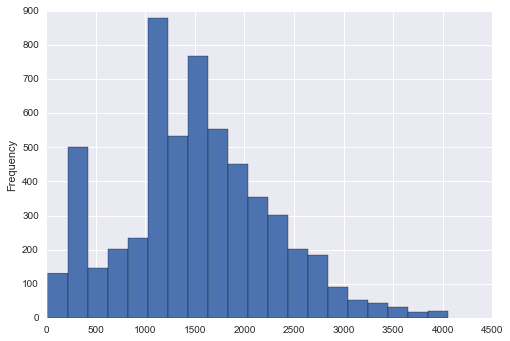

In [6]:
desclength.plot(bins=20, kind='hist')

In [7]:
desc_pop = pd.concat([descriptions, desclength, popularity], axis=1)

In [8]:
desc_pop.head()

,description,desclength,popularity
0,Lovely One Bedroom Apartment This is a big wel...,701,False
1,Best Secret in Town Convenience is the key for...,1828,False
2,3 Bd 2.5 Ba Full Flat Condo w Views Our family...,2205,False
3,Blocks from GG Park & Ocean Beach Large 2BD ap...,1628,False
4,Ocean Beach hilltop cottage Newly built cottag...,1931,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1093e6950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10969cd90>], dtype=object)

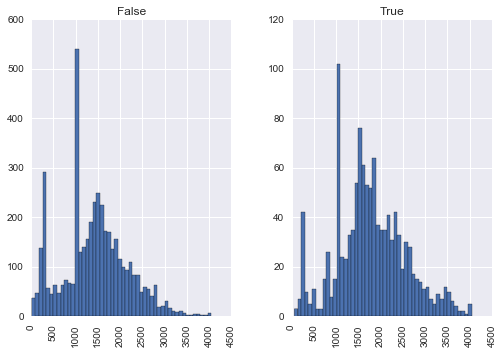

In [9]:
desc_pop.hist(column='desclength', by='popularity', bins=50)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer(ngram_range=(1,3))

trainsummary = countvect.fit(descriptions)

In [11]:
print trainsummary
print trainsummary.get_feature_names()[:20]

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
[u'00', u'00 00', u'00 00 de', u'00 00 free', u'00 00 street', u'00 00am', u'00 00am there', u'00 00am to', u'00 10', u'00 10 00', u'00 adult', u'00 adult citypass', u'00 adults', u'00 adults under', u'00 age', u'00 age 17', u'00 alamo', u'00 alamo sq', u'00 am', u'00 am 00']


In [ ]:
transformx = trainsummary.transform(descriptions)
#print transformx[:10]

transformx_back = transformx.toarray()
#print transformx_back

X = transformx_back
y = reviews_per_month > 3
print X[:5]
print y[:5]

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
0    False
1    False
2    False
3    False
4     True
Name: reviews_per_month, dtype: bool


In [ ]:
from sklearn.cross_validation import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=70)

In [ ]:
# a few helper functions
def accuracy_report(_clf):
    print "Accuracy on test data: %0.2f%%" % (100 * _clf.score(xtest, ytest))

    #Print the accuracy on the test and training dataset
    training_accuracy = _clf.score(xtrain, ytrain)
    test_accuracy = _clf.score(xtest, ytest)

    print "Accuracy on training data: %0.2f%%" % (100 * training_accuracy)
    
# a function to run some tests
def AnalyzeReview(testquote, _clf):
    print "The test quote" + " is judged by clasifier to be..."
    testquote = trainsummary.transform([testquote])

    if (_clf.predict(testquote)[0] == 1):
        print "... a popular listing."
    else:
        print "... an unpopular listing."
    return(_clf.predict(testquote)[0])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clfm = MultinomialNB()
clfm.fit(xtrain, ytrain)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clfb = BernoulliNB()
clfb.fit(xtrain, ytrain)

In [ ]:
from sklearn.linear_model import LogisticRegression
clfl = LogisticRegression()
clfl.fit(xtrain, ytrain)

In [ ]:
test_desc = 'Newly built cottage that comfortably sleeps 2. This brand new \
cottage is warm, safe, and perfectly located for the ultimate and most \
convenient way to visit San Francisco. Beautiful views of the pacific \
ocean and a few blocks from golden gate park. '

In [ ]:
print "MultinomialNB Results:"
accuracy_report(clfm)
AnalyzeReview(test_desc, clfm)
print
print "BernoulliNB Results:"
accuracy_report(clfb)
AnalyzeReview(test_desc, clfb)
print
print "Logistic Regession:"
accuracy_report(clfl)
AnalyzeReview(test_desc, clfl)

In [ ]:
from sklearn.metrics import confusion_matrix

plt.matshow(confusion_matrix(ytest, clfl.predict(xtest)), 
            cmap=plt.cm.Blues)
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [ ]:
confusion_matrix(ytest, clfl.predict(xtest))